<a href="https://colab.research.google.com/github/AlvinChiew/MachineLearning/blob/main/Sklearn_Regression_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

- Motivation
    - simple prediction model for dataset with high dimensionality issue
    - applies when dataset has many useless features

- Minimize MSE + alpha (or lambda) x |slope| --> ridge regression penalty
    - use |slope| instead of slope^2 in ridge regression
    - slope can be 0 (completely remove a feature) instead of closer but not equal to 0 in ridge regression

- more complex alternative : 
    - elastic-net regression (combination of lasso and ridge) - when feature usefulness is unknown
    - recursive feature elimination correlation technique

# Import Module

In [4]:
!wget https://raw.githubusercontent.com/AlvinChiew/MachineLearning/main/raw_data/gen_data.py

--2020-12-21 15:46:14--  https://raw.githubusercontent.com/AlvinChiew/MachineLearning/main/raw_data/gen_data.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1494 (1.5K) [text/plain]
Saving to: ‘gen_data.py’

gen_data.py         100%[===================>]   1.46K  --.-KB/s    in 0s      

2020-12-21 15:46:14 (32.4 MB/s) - ‘gen_data.py’ saved [1494/1494]



In [23]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from gen_data import load_extended_boston

In [13]:
from sklearn.datasets import load_boston
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Load Data & Pre-Process

In [10]:
load_extended_boston()
# scaled by min-max, added polynomial features (power to 2) with bias column (power to 0 ) excluded

(array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
         1.00000000e+00, 8.96799117e-02, 8.04248656e-03],
        [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
         1.00000000e+00, 2.04470199e-01, 4.18080621e-02],
        [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
         9.79579831e-01, 6.28144504e-02, 4.02790570e-03],
        ...,
        [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
         1.00000000e+00, 1.07891832e-01, 1.16406475e-02],
        [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
         9.82676920e-01, 1.29930407e-01, 1.71795127e-02],
        [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
         1.00000000e+00, 1.69701987e-01, 2.87987643e-02]]),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7,

In [9]:
X, y = load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

# Train Model

In [22]:
alpha_range = np.linspace(0.025, 5, 200)    # lower alpha, steeper slope, higher sensitivity to changes in features

train_score = []
test_score = []
coefs = []

for alpha in alpha_range:
    model = Lasso(alpha=alpha).fit(X_train, y_train)
    train_score.append(model.score(X_train, y_train))
    test_score.append(model.score(X_test, y_test))
    coefs.append(model.coef_)

# Evaluation

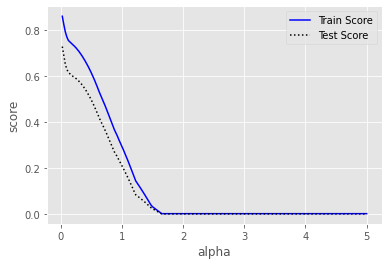

In [24]:
plt.style.use('ggplot')
plt.figure(1)
plt.plot(alpha_range, train_score, 'b-')
plt.plot(alpha_range, test_score, 'k:')
plt.legend(['Train Score', 'Test Score'])
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

# Proved that alpha = 0 is the best, i.e. no bias should be applied. 
# Use normal regression instead. All features are contributing to prediction

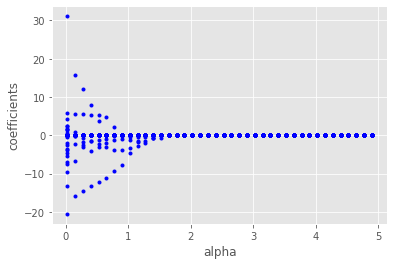

In [27]:
plt.figure(2)
for a,c in zip(alpha_range[::5], coefs[::5]):
    plt.plot(a*np.ones_like(c), c, 'b.')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

# Proved that higher alpha, smaller feature sensitivity. Ended up removing all features with coef = 0.